# ¿Cuál es la mejor tarifa?

Estamos trabajando como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Introducción

El propósito de este proyecto es analizar el comportamiento de los usuarios de los planes de llamadas y datos ofrecidos por la empresa Megaline, con el objetivo de determinar cuál de los planes genera mayores ingresos y comprender cómo varía el uso de los servicios entre diferentes segmentos de usuarios. Este análisis permitirá a Megaline tomar decisiones informadas para optimizar sus estrategias de marketing, precios y desarrollo de productos.

## Acciones planeadas

Las acciones planeadas para llevar a cabo este análisis incluyen:

1. **Preparación de datos:**
   - Revisión, limpieza y enriquecimiento de los datos proporcionados para asegurar que estén en un formato adecuado para el análisis.
   - Identificación y corrección de problemas comunes en los datos, como valores ausentes, duplicados y tipos de datos incorrectos.

2. **Análisis descriptivo:**
   - Exploración del comportamiento de los usuarios en términos de llamadas, mensajes y tráfico de internet.
   - Cálculo de estadísticas descriptivas para entender mejor las diferencias en el uso de los servicios entre los distintos planes.

3. **Análisis comparativo:**
   - Comparación de los ingresos generados por los usuarios de los distintos planes y en diferentes regiones geográficas.
   - Pruebas de hipótesis para determinar si las diferencias observadas son estadísticamente significativas.

4. **Conclusiones y recomendaciones:**
   - Basado en los hallazgos del análisis, se elaborarán recomendaciones sobre cómo Megaline puede ajustar sus estrategias para maximizar la rentabilidad y satisfacer mejor las necesidades de sus usuarios.

Este proyecto no solo proporcionará una visión detallada del comportamiento de los usuarios de Megaline, sino que también ofrecerá una base sólida para decisiones empresariales estratégicas.

## Diccionario de datos

En este proyecto, se trabajará con cinco tablas diferentes.

1. **La tabla `users` (datos sobre los usuarios):**
   - `user_id`: identificador único del usuario.
   - `first_name`: nombre del usuario.
   - `last_name`: apellido del usuario.
   - `age`: edad del usuario (en años).
   - `reg_date`: fecha de suscripción (dd, mm, aa).
   - `churn_date`: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
   - `city`: ciudad de residencia del usuario.
   - `plan`: nombre de la tarifa.

2. **La tabla `calls` (datos sobre las llamadas):**
   - `id`: identificador único de la llamada.
   - `call_date`: fecha de la llamada.
   - `duration`: duración de la llamada (en minutos).
   - `user_id`: el identificador del usuario que realiza la llamada.

3. **La tabla `messages` (datos sobre los SMS):**
   - `id`: identificador único del SMS.
   - `message_date`: fecha del SMS.
   - `user_id`: el identificador del usuario que manda el SMS.

4. **La tabla `internet` (datos sobre las sesiones web):**
   - `id`: identificador único de la sesión.
   - `mb_used`: el volumen de datos gastados durante la sesión (en megabytes).
   - `session_date`: fecha de la sesión web.
   - `user_id`: identificador del usuario.

5. **La tabla `plans` (datos sobre las tarifas):**
   - `plan_name`: nombre de la tarifa.
   - `usd_monthly_fee`: pago mensual en dólares estadounidenses.
   - `minutes_included`: minutos incluidos al mes.
   - `messages_included`: SMS incluidos al mes.
   - `mb_per_month_included`: datos incluidos al mes (en megabytes).
   - `usd_per_minute`: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
   - `usd_per_message`: precio por SMS tras exceder los límites del paquete.
   - `usd_per_gb`: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users_df = pd.read_csv('/datasets/megaline_users.csv')
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')

# Visualizar las primeras filas de cada DataFrame para confirmar la carga
print(users_df.head())
print(calls_df.head())
print(messages_df.head())
print(internet_df.head())
print(plans_df.head())



   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id message_date
0  10

## Preparar los datos

## Tarifas

In [3]:
print(plans_df.info())# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
print(plans_df.describe())

print(plans_df.head())# Imprime una muestra de los datos para las tarifas



       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000        0.010000  
25%          32.500000     7

Información general (plans_df.info()):

Columnas: Hay un total de 8 columnas, todas con 2 valores no nulos.

Tipos de datos:
- Las columnas relacionadas con valores numéricos (como usd_monthly_pay, usd_per_gb, etc.) están correctamente definidas como int64 o float64, lo cual es adecuado para los análisis que vas a realizar.
- La columna plan_name es de tipo object, que es apropiado para almacenar cadenas de texto.

Muestra de datos (plans_df.head()):

Datos: Se muestran dos filas correspondientes a las tarifas 'surf' y 'ultimate', con información detallada sobre los mensajes, megabytes, minutos incluidos, y los costos adicionales por exceder los límites del plan.
Problemas identificados:

Tipos de datos: No parece haber problemas con los tipos de datos en este DataFrame, ya que todos parecen estar correctamente definidos.

Datos ausentes: No hay valores ausentes (NaN) en las columnas, lo que indica que los datos están completos.

Redondeo: No se observa ningún problema relacionado con el redondeo en los costos por minutos, mensajes o gigabytes adicionales.

En general, la tabla plans_df parece estar en buen estado y lista para ser utilizada en análisis posteriores. No se requieren cambios adicionales en este DataFrame en cuanto a correcciones de tipos de datos o tratamiento de valores ausentes.

## Corregir datos

Después de revisar la información general y una muestra de los datos en el DataFrame `plans_df`, no se identificaron problemas evidentes. Los tipos de datos son adecuados y no hay valores ausentes en este DataFrame. Por lo tanto, no se requiere ninguna corrección en esta tabla en particular.


## Enriquecer los datos

Después de considerar la posibilidad de enriquecer los datos del DataFrame plans_df con columnas adicionales, como los costos promedio por minuto, mensaje y gigabyte extra, se determinó que estas no agregarían información relevante o nueva, ya que los datos necesarios para el análisis ya están presentes en las columnas originales. Por lo tanto, no se requiere añadir columnas adicionales en esta tabla.


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
print(users_df.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Observaciones sobre el DataFrame users_df:

Estructura general:

El DataFrame tiene 500 filas y 8 columnas.

Las columnas user_id, first_name, last_name, age, city, y plan no tienen valores ausentes.

La columna churn_date tiene valores nulos (NaN) para la mayoría de los usuarios (466 de los 500 usuarios no tienen fecha de cancelación, lo que indica que aún están activos).

Tipos de datos:

Los tipos de datos son generalmente adecuados:

- user_id y age son enteros (int64).
- first_name, last_name, city, plan y reg_date son cadenas de texto (object).
- churn_date es una cadena de texto (object), lo cual es adecuado dado que representa una fecha, aunque convertirla a formato datetime podría facilitar futuros análisis.

Valores ausentes:

La columna churn_date tiene valores ausentes (NaN), lo que es esperado para los usuarios que aún están activos. No hay problemas evidentes con estos valores ausentes ya que reflejan información válida sobre el estado de los usuarios.

Problemas potenciales:

Formato de fechas: Tanto reg_date como churn_date están en formato object. Sería conveniente convertir estas columnas a formato datetime para facilitar operaciones relacionadas con fechas.

Valores ausentes en churn_date: No se consideran un problema, pero es importante tratarlos adecuadamente en los análisis posteriores, como al calcular la duración del uso de un plan.

### Corregir los datos

In [9]:
# Convertir las columnas reg_date y churn_date a formato datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

# Verificar los cambios
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


### Enriquecer los datos

Se puede calcular el tiempo que un usuario ha estado utilizando el servicio. Esto puede ser útil para correlacionar la duración con el plan o con la retención de clientes.

También se le puede añadir una columna que indique en qué año se registró el usuario, lo que puede ser útil para análisis de cohortes.

In [10]:
# Calcular la duración del servicio en días
users_df['service_duration'] = (users_df['churn_date'] - users_df['reg_date']).dt.days

# Para los usuarios activos, calcular la duración hasta la fecha actual
users_df['service_duration'].fillna((pd.to_datetime('today') - users_df['reg_date']).dt.days, inplace=True)

# Verificar los cambios
print(users_df.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  service_duration  
0 2018-12-24  ultimate        NaT            2092.0  
1 2018-08-13      surf        NaT            2225.0  
2 2018-10-21      surf        NaT            2156.0  
3 2018-01-28      surf        NaT            2422.0  
4 2018-05-23      surf        NaT            2307.0  


In [11]:
# Agregar columna con el año de registro
users_df['registration_year'] = users_df['reg_date'].dt.year

# Verificar los cambios
print(users_df.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  service_duration  registration_year  
0 2018-12-24  ultimate        NaT            2092.0               2018  
1 2018-08-13      surf        NaT            2225.0               2018  
2 2018-10-21      surf        NaT            2156.0               2018  
3 2018-01-28      surf        NaT            2422.0               2018  
4 2018-05-23      surf        NaT            2307.0               2018  


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [13]:
# Imprime una muestra de datos para las llamadas
print(calls_df.head())



         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Observaciones sobre el DataFrame calls_df:

Estructura general:

El DataFrame contiene 137,735 registros y 4 columnas.
Todas las columnas (id, user_id, call_date, duration) están completas, sin valores nulos.

Tipos de datos:

- La columna id es de tipo object, lo cual es común para identificadores que no necesariamente son numéricos.
- La columna user_id es de tipo int64, que es adecuado para identificadores de usuarios.
- La columna call_date es de tipo object, pero debería ser convertida a datetime para facilitar el análisis temporal.
- La columna duration es de tipo float64, que es apropiado para representar la duración de las llamadas en minutos.

Duración de las llamadas:

Las duraciones están representadas con decimales, lo cual es adecuado para la precisión requerida en este caso. Sin embargo, en algunos casos podrías encontrar duraciones extremadamente pequeñas o incluso cero, que podrían requerir una revisión dependiendo del contexto de uso.

Problemas potenciales:

Formato de fechas: La columna call_date está en formato object, lo cual no es ideal para fechas. Debería ser convertida a formato datetime para facilitar cualquier análisis basado en el tiempo.

Duraciones anómalas: Sería prudente revisar si existen valores anómalos en la columna duration, como llamadas con duración de 0 minutos o valores negativos, aunque en la muestra no se han observado.

### Corregir los datos

Basándonos en las observaciones anteriores, las correcciones necesarias incluyen la conversión de la columna call_date a datetime y la verificación de duraciones anómalas en la columna duration.

In [14]:
# Convertir la columna call_date a formato datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Verificar si hay duraciones anómalas (duración <= 0)
anomalous_durations = calls_df[calls_df['duration'] <= 0]
print("Duraciones anómalas encontradas:")
print(anomalous_durations)

# Si es necesario, eliminar las duraciones anómalas
calls_df = calls_df[calls_df['duration'] > 0]

# Verificar los cambios
print(calls_df.info())

Duraciones anómalas encontradas:
              id  user_id  call_date  duration
19        1001_4     1001 2018-12-05       0.0
25       1001_13     1001 2018-12-24       0.0
31       1001_30     1001 2018-10-17       0.0
32       1001_31     1001 2018-11-03       0.0
34       1001_35     1001 2018-12-21       0.0
...          ...      ...        ...       ...
137714  1499_183     1499 2018-11-10       0.0
137715  1499_184     1499 2018-09-15       0.0
137720  1499_189     1499 2018-12-27       0.0
137722  1499_191     1499 2018-12-24       0.0
137725  1499_194     1499 2018-10-31       0.0

[26834 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-

### Enriquecer los datos

Dado que Megaline redondea los segundos a minutos, se puede agregar una columna que refleje la duración redondeada al alza para cada llamada. También se puede agregar una columna que indique el mes en que se realizó cada llamada. Esto podría ser útil para análisis estacionales o temporales.

In [15]:
# Agregar una columna con la duración redondeada al alza y almacenarla como entero
calls_df['rounded_duration'] = np.ceil(calls_df['duration']).astype(int)

# Verificar los cambios
print(calls_df.head())

         id  user_id  call_date  duration  rounded_duration
0   1000_93     1000 2018-12-27      8.52                 9
1  1000_145     1000 2018-12-27     13.66                14
2  1000_247     1000 2018-12-27     14.48                15
3  1000_309     1000 2018-12-28      5.76                 6
4  1000_380     1000 2018-12-30      4.22                 5


In [16]:
# Agregar una columna con el mes de la llamada
calls_df['call_month'] = calls_df['call_date'].dt.month

# Verificar los cambios
print(calls_df.head())

         id  user_id  call_date  duration  rounded_duration  call_month
0   1000_93     1000 2018-12-27      8.52                 9          12
1  1000_145     1000 2018-12-27     13.66                14          12
2  1000_247     1000 2018-12-27     14.48                15          12
3  1000_309     1000 2018-12-28      5.76                 6          12
4  1000_380     1000 2018-12-30      4.22                 5          12


## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [18]:
# Imprime una muestra de datos para los mensajes
print(messages_df.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Observaciones sobre el DataFrame messages_df:

Estructura general:

El DataFrame contiene 76,051 registros y 3 columnas.
Las columnas son id, user_id, y message_date.
No hay valores nulos en ninguna de las columnas, lo que indica que los datos están completos.

Tipos de datos:

- La columna id es de tipo object, lo cual es común para identificadores que no necesariamente son numéricos.
- La columna user_id es de tipo int64, que es adecuado para identificadores de usuarios.
- La columna message_date es de tipo object, lo cual no es ideal para fechas. Debería ser convertida a datetime para facilitar el análisis temporal.

Problemas potenciales:

Formato de fechas: La columna message_date está en formato object, lo cual no es adecuado para operaciones relacionadas con fechas. Debería ser convertida a datetime.

### Corregir los datos

Basándonos en las observaciones iniciales, la corrección principal que necesitas hacer es convertir la columna message_date a formato datetime.

In [19]:
# Convertir la columna message_date a formato datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

# Verificar los cambios
print(messages_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


### Enriquecer los datos

Se puede agregar una columna que indique el mes en que se envió cada mensaje. Esto podría ser útil para análisis estacionales o temporales. Otra opción es agregar una columna que indique el día de la semana en que se envió cada mensaje, lo cual podría ser útil para identificar patrones de uso durante la semana.

In [20]:
# Agregar una columna con el mes del mensaje
messages_df['message_month'] = messages_df['message_date'].dt.month

In [21]:
# Agregar una columna con el día de la semana del mensaje
messages_df['message_weekday'] = messages_df['message_date'].dt.day_name()

# Verificar los cambios
print(messages_df.head())

         id  user_id message_date  message_month message_weekday
0  1000_125     1000   2018-12-27             12        Thursday
1  1000_160     1000   2018-12-31             12          Monday
2  1000_223     1000   2018-12-31             12          Monday
3  1000_251     1000   2018-12-27             12        Thursday
4  1000_255     1000   2018-12-26             12       Wednesday


## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [23]:
# Imprime una muestra de datos para el tráfico de internet
print(internet_df.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Observaciones sobre el DataFrame internet_df:

Estructura general:

El DataFrame contiene 104,825 registros y 4 columnas (id, user_id, session_date, mb_used).
No hay valores nulos en ninguna de las columnas, lo que indica que los datos están completos.

Tipos de datos:

- La columna id es de tipo object, lo cual es común para identificadores que no necesariamente son numéricos.
- La columna user_id es de tipo int64, lo cual es adecuado para identificadores de usuarios.
- La columna session_date es de tipo object, pero debería ser convertida a datetime para facilitar el análisis temporal.
- La columna mb_used es de tipo float64, lo cual es adecuado para representar el volumen de datos utilizados en megabytes (MB).

Problemas potenciales:

Formato de Fechas: La columna session_date está en formato object, lo cual no es ideal para operaciones relacionadas con fechas. Debería ser convertida a datetime para facilitar el análisis temporal.
Valores Anómalos en mb_used: Sería prudente verificar si existen valores anómalos en la columna mb_used, como valores negativos o excesivamente altos, que podrían indicar errores en los datos.

### Corregir los datos

In [24]:
# Convertir la columna session_date a formato datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Verificar si hay valores anómalos en mb_used (por ejemplo, valores negativos)
anomalous_data_usage = internet_df[internet_df['mb_used'] < 0]
print("Uso de datos anómalo encontrado:")
print(anomalous_data_usage)

# Si es necesario, eliminar los valores anómalos
internet_df = internet_df[internet_df['mb_used'] >= 0]

# Verificar los cambios
print(internet_df.info())

Uso de datos anómalo encontrado:
Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None


### Enriquecer los datos

Para enriquecer los datos de uso de internet, se debe calcular el total de megabytes usados por cada usuario en cada mes. Luego, se convierte este total mensual a gigabytes, y se redondea hacia arriba para reflejar cómo se cobran los datos en el plan de tarifas. También se puede agregar una columna que indique el mes en que se realizó cada sesión de internet, lo que podría ser útil para análisis estacionales o temporales. Este enfoque asegura que los análisis futuros sean precisos y se alineen con las políticas de facturación establecidas.

In [25]:
# Agregar la columna session_month exista en el DataFrame
internet_df['session_month'] = internet_df['session_date'].dt.month

# Sumar los megabytes usados por cada usuario en cada mes
internet_df = internet_df.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()

# Convertir los megabytes totales del mes a gigabytes
internet_df['total_gb_used'] = internet_df['mb_used'] / 1024

# Redondear hacia arriba el uso total de gigabytes por mes
internet_df['rounded_gb_used'] = np.ceil(internet_df['total_gb_used'])

# Verificar los cambios
print(internet_df.head())


   user_id  session_month   mb_used  total_gb_used  rounded_gb_used
0     1000             12   1901.47       1.856904              2.0
1     1001              8   6919.15       6.756982              7.0
2     1001              9  13314.82      13.002754             14.0
3     1001             10  22330.49      21.807119             22.0
4     1001             11  18504.30      18.070605             19.0


## Estudiar las condiciones de las tarifas

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
# Imprime la información general sobre las tarifas
print(plans_df)

# Imprime detalles específicos de cada tarifa
for plan in plans_df['plan_name']:
    print(f"\nDetalles del plan: {plan}")
    print(plans_df[plans_df['plan_name'] == plan])

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  

Detalles del plan: surf
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  

Detalles del plan: ultimate
   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7  

## Agregar datos por usuario


In [ ]:
# Calcular el número de llamadas hechas por cada usuario al mes
calls_per_month = calls_df.groupby(['user_id', calls_df['call_date'].dt.month])['id'].count().reset_index()
calls_per_month.columns = ['user_id', 'month', 'calls_made']

# Verificar los resultados
print(calls_per_month.head())

   user_id  month  calls_made
0     1000     12          16
1     1001      8          22
2     1001      9          38
3     1001     10          47
4     1001     11          49


In [ ]:
# Calcular la cantidad de minutos usados por cada usuario al mes
minutes_per_month = calls_df.groupby(['user_id', calls_df['call_date'].dt.month])['rounded_duration'].sum().reset_index()
minutes_per_month.columns = ['user_id', 'month', 'minutes_used']

# Verificar los resultados
print(minutes_per_month.head())

   user_id  month  minutes_used
0     1000     12           124
1     1001      8           182
2     1001      9           315
3     1001     10           393
4     1001     11           426


In [ ]:
# Calcular el número de mensajes enviados por cada usuario al mes
messages_per_month = messages_df.groupby(['user_id', messages_df['message_date'].dt.month])['id'].count().reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages_sent']

# Verificar los resultados
print(messages_per_month.head())

   user_id  month  messages_sent
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36


In [ ]:
# Calcular el volumen del tráfico de Internet usado por cada usuario al mes
internet_per_month = internet_df.groupby(['user_id', 'session_month'])['rounded_gb_used'].sum().reset_index()
internet_per_month.columns = ['user_id', 'month', 'gb_used']

# Verificar los resultados
print(internet_per_month.head())

   user_id  month  gb_used
0     1000     12      2.0
1     1001      8      7.0
2     1001      9     14.0
3     1001     10     22.0
4     1001     11     19.0


In [31]:
# Unir todos los DataFrames en uno solo
user_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
user_data = user_data.merge(messages_per_month, on=['user_id', 'month'], how='outer')
user_data = user_data.merge(internet_per_month, on=['user_id', 'month'], how='outer')

# Llenar NaN con 0, ya que la ausencia de datos significa que no hubo actividad
user_data = user_data.fillna(0)

# Verificar el DataFrame final
print(user_data.head())


   user_id  month  calls_made  minutes_used  messages_sent  gb_used
0     1000     12        16.0         124.0           11.0      2.0
1     1001      8        22.0         182.0           30.0      7.0
2     1001      9        38.0         315.0           44.0     14.0
3     1001     10        47.0         393.0           53.0     22.0
4     1001     11        49.0         426.0           36.0     19.0


In [32]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusionar user_data con users_df para agregar la información de la tarifa
user_data_with_plan = user_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Verificar el resultado
print(user_data_with_plan.head())

   user_id  month  calls_made  minutes_used  messages_sent  gb_used      plan
0     1000     12        16.0         124.0           11.0      2.0  ultimate
1     1001      8        22.0         182.0           30.0      7.0      surf
2     1001      9        38.0         315.0           44.0     14.0      surf
3     1001     10        47.0         393.0           53.0     22.0      surf
4     1001     11        49.0         426.0           36.0     19.0      surf


In [ ]:
# Fusionar user_data_with_plan con plans_df para añadir detalles de la tarifa
final_data = user_data_with_plan.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Verificar el resultado
print(final_data.head())

   user_id  month  calls_made  minutes_used  messages_sent  gb_used      plan  \
0     1000     12        16.0         124.0           11.0      2.0  ultimate   
1     1001      8        22.0         182.0           30.0      7.0      surf   
2     1001      9        38.0         315.0           44.0     14.0      surf   
3     1001     10        47.0         393.0           53.0     22.0      surf   
4     1001     11        49.0         426.0           36.0     19.0      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               70           7             0.0

Primero, para cada usuario, calcularemos si ha excedido los límites de minutos, mensajes y datos, y en caso afirmativo, determinaremos los cargos adicionales. Una vez que tengamos los excesos, multiplicaremos por las tarifas correspondientes. Sumaremos los cargos adicionales con la tarifa mensual base para obtener el ingreso total mensual de cada usuario.

In [34]:
# Calcular el exceso de minutos, mensajes y datos
final_data['extra_minutes'] = final_data['minutes_used'] - final_data['minutes_included']
final_data['extra_messages'] = final_data['messages_sent'] - final_data['messages_included']
final_data['extra_gb'] = final_data['gb_used'] - (final_data['mb_per_month_included'] / 1024)

# Asegurarnos de que los valores negativos se conviertan en 0, ya que no hay cargos adicionales si no exceden los límites
final_data['extra_minutes'] = final_data['extra_minutes'].apply(lambda x: max(x, 0))
final_data['extra_messages'] = final_data['extra_messages'].apply(lambda x: max(x, 0))
final_data['extra_gb'] = final_data['extra_gb'].apply(lambda x: max(x, 0))

# Verificar los resultados intermedios
print(final_data[['user_id', 'month', 'extra_minutes', 'extra_messages', 'extra_gb']].head())


   user_id  month  extra_minutes  extra_messages  extra_gb
0     1000     12            0.0             0.0       0.0
1     1001      8            0.0             0.0       0.0
2     1001      9            0.0             0.0       0.0
3     1001     10            0.0             3.0       7.0
4     1001     11            0.0             0.0       4.0


In [35]:
# Calcular los cargos adicionales
final_data['extra_charge_minutes'] = final_data['extra_minutes'] * final_data['usd_per_minute']
final_data['extra_charge_messages'] = final_data['extra_messages'] * final_data['usd_per_message']
final_data['extra_charge_gb'] = final_data['extra_gb'] * final_data['usd_per_gb']

# Verificar los cargos adicionales
print(final_data[['user_id', 'month', 'extra_charge_minutes', 'extra_charge_messages', 'extra_charge_gb']].head())


   user_id  month  extra_charge_minutes  extra_charge_messages  \
0     1000     12                   0.0                   0.00   
1     1001      8                   0.0                   0.00   
2     1001      9                   0.0                   0.00   
3     1001     10                   0.0                   0.09   
4     1001     11                   0.0                   0.00   

   extra_charge_gb  
0              0.0  
1              0.0  
2              0.0  
3             70.0  
4             40.0  


In [36]:
# Calcular el ingreso mensual total
final_data['monthly_revenue'] = final_data['usd_monthly_pay'] + final_data['extra_charge_minutes'] + final_data['extra_charge_messages'] + final_data['extra_charge_gb']

# Verificar el ingreso mensual calculado
print(final_data[['user_id', 'month', 'monthly_revenue']].head())


   user_id  month  monthly_revenue
0     1000     12            70.00
1     1001      8            20.00
2     1001      9            20.00
3     1001     10            90.09
4     1001     11            60.00


## Estudia el comportamiento de usuario

### Llamadas

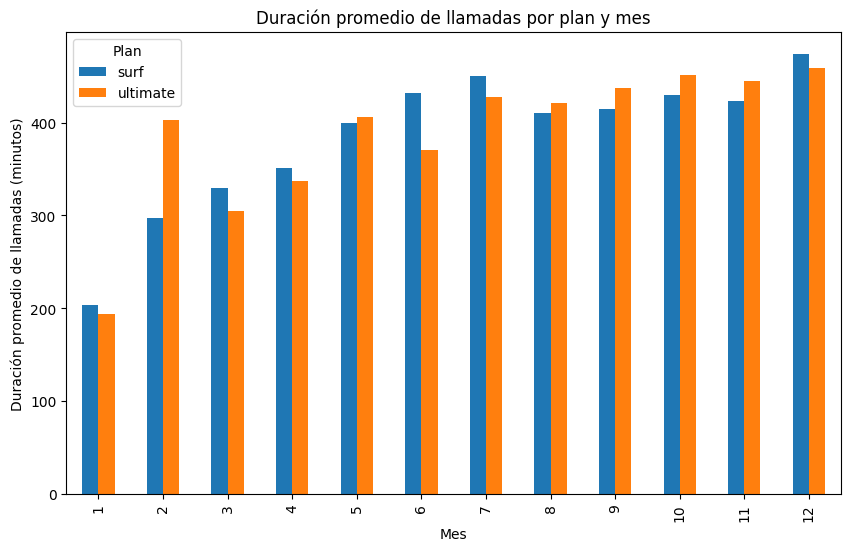

In [37]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt

# Calcular la duración promedio de llamadas por plan y mes
average_call_duration = final_data.groupby(['month', 'plan'])['minutes_used'].mean().unstack()

# Graficar la duración promedio de llamadas usando el método plot del DataFrame
average_call_duration.plot(kind='bar', figsize=(10, 6))

plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')
plt.show()



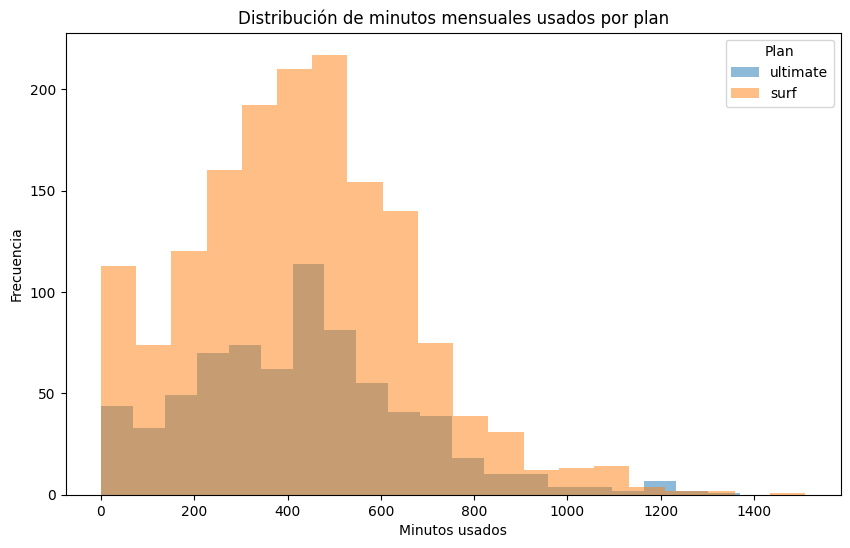

In [ ]:
# Graficar el histograma del número de minutos mensuales por plan
plt.figure(figsize=(10, 6))
for plan in final_data['plan'].unique():
    plt.hist(final_data[final_data['plan'] == plan]['minutes_used'], bins=20, alpha=0.5, label=plan)

plt.title('Distribución de minutos mensuales usados por plan')
plt.xlabel('Minutos usados')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()


In [ ]:
# Calcular la media y la varianza de la duración mensual de llamadas por plan
call_duration_stats = final_data.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()

# Verificar los resultados
print(call_duration_stats)

       plan        mean           var
0      surf  428.749523  54968.279461
1  ultimate  430.450000  57844.464812


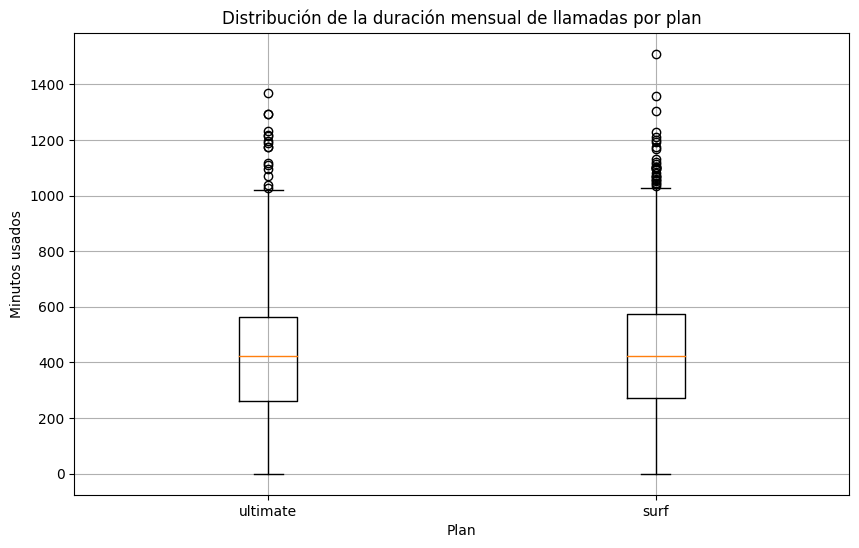

In [40]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import matplotlib.pyplot as plt

# Crear un diagrama de caja para la duración mensual de llamadas por plan
plt.figure(figsize=(10, 6))

# Usar boxplot de matplotlib
plans = final_data['plan'].unique()
data_to_plot = [final_data[final_data['plan'] == plan]['minutes_used'] for plan in plans]

plt.boxplot(data_to_plot, labels=plans)

plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos usados')
plt.grid(True)
plt.show()



Al analizar los gráficos y estadísticas obtenidas, podemos observar lo siguiente:

Duración promedio de llamadas:

- La duración promedio de las llamadas mensuales no muestra una diferencia significativa entre los planes Surf y Ultimate. Ambos planes tienen una duración promedio cercana a los 430 minutos, lo que sugiere que, en promedio, los usuarios de ambos planes utilizan un tiempo similar para realizar sus llamadas.

Varianza de la duración de las llamadas:

- La varianza de la duración de las llamadas es ligeramente mayor para el plan Ultimate en comparación con el plan Surf. Esto indica que hay una mayor dispersión en la duración de las llamadas entre los usuarios del plan Ultimate, lo que podría implicar un comportamiento más variado en este grupo.

Distribución de la duración de llamadas (Diagrama de caja):

- El diagrama de caja muestra que la mediana de la duración de las llamadas es similar para ambos planes, pero hay más valores atípicos (outliers) en el plan Surf. Estos valores atípicos representan usuarios que realizan una cantidad significativa de llamadas que exceden la duración promedio.
- Ambos planes tienen usuarios que hacen un uso intensivo de las llamadas, pero este comportamiento es más pronunciado en el plan Surf, como lo indican los outliers.

Conclusión final:

El comportamiento de los usuarios en cuanto a la duración de las llamadas no varía drásticamente en función del plan que eligen. Ambos planes tienen una duración promedio de llamadas similar, aunque el plan Surf muestra una mayor cantidad de usuarios que exceden la duración promedio, sugiriendo que algunos usuarios del plan Surf podrían estar utilizando sus llamadas de manera más intensiva.

Este análisis podría indicar que los factores que influyen en la elección del plan no están estrictamente relacionados con la duración de las llamadas, sino posiblemente con otros servicios como mensajes o datos. Sin embargo, ambos planes parecen atender de manera eficiente las necesidades de la mayoría de los usuarios en términos de duración de llamadas.

### Mensajes

       plan       mean          var
0      surf  31.159568  1126.724522
1  ultimate  37.551389  1208.756744


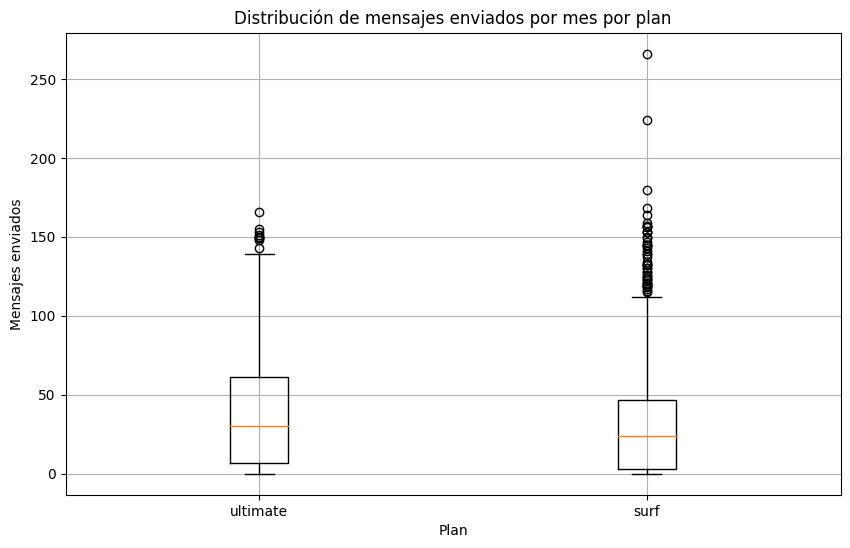

In [41]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
import matplotlib.pyplot as plt

# Calcular la media y la varianza del número de mensajes enviados por plan
message_stats = final_data.groupby('plan')['messages_sent'].agg(['mean', 'var']).reset_index()

# Verificar los resultados
print(message_stats)

# Crear un diagrama de caja para la cantidad de mensajes enviados por plan
plt.figure(figsize=(10, 6))
plans = final_data['plan'].unique()
data_to_plot = [final_data[final_data['plan'] == plan]['messages_sent'] for plan in plans]

plt.boxplot(data_to_plot, labels=plans)
plt.title('Distribución de mensajes enviados por mes por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados')
plt.grid(True)
plt.show()

       plan       mean       var
0      surf  16.670693  61.58360
1  ultimate  17.306944  58.83055


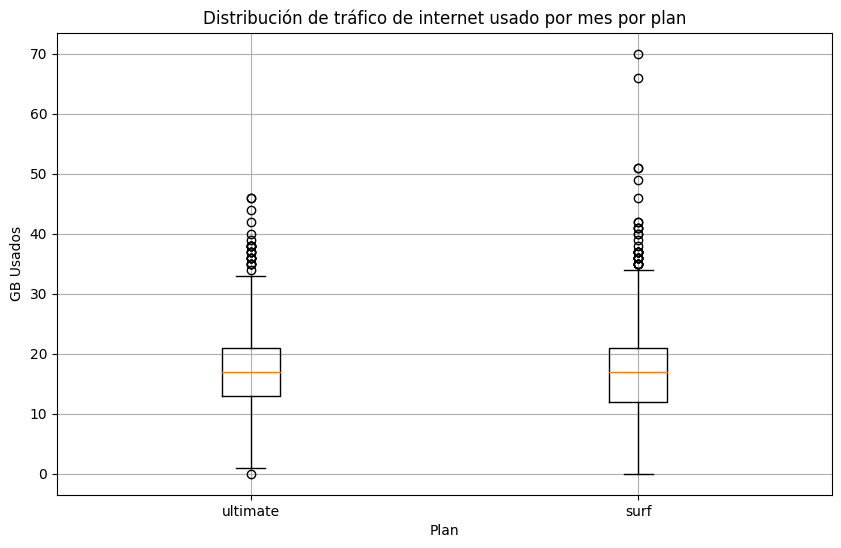

In [ ]:
# Calcular la media y la varianza del tráfico de Internet por plan
internet_stats = final_data.groupby('plan')['gb_used'].agg(['mean', 'var']).reset_index()

# Verificar los resultados
print(internet_stats)

# Crear un diagrama de caja para la cantidad de tráfico de Internet por plan
plt.figure(figsize=(10, 6))
data_to_plot = [final_data[final_data['plan'] == plan]['gb_used'] for plan in plans]

plt.boxplot(data_to_plot, labels=plans)
plt.title('Distribución de tráfico de internet usado por mes por plan')
plt.xlabel('Plan')
plt.ylabel('GB Usados')
plt.grid(True)
plt.show()

Estas son las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes y el uso de Internet

Mensajes:

- Duración promedio de mensajes enviados:

La media del número de mensajes enviados es ligeramente mayor para el plan Ultimate (37.55 mensajes por mes) en comparación con el plan Surf (31.16 mensajes por mes). Sin embargo, la diferencia no es muy significativa.

- Varianza de mensajes enviados:

La varianza es bastante alta para ambos planes, lo que indica una gran variabilidad en la cantidad de mensajes enviados entre los usuarios. Esto sugiere que, aunque el promedio de mensajes enviados es similar, algunos usuarios envían muchos más mensajes que otros, especialmente en el plan Surf, donde se observan más outliers en el diagrama de caja.

Distribución de mensajes enviados (Diagrama de caja):

Ambos planes muestran una distribución similar con un rango intercuartil que sugiere que la mayoría de los usuarios envían menos de 50 mensajes por mes. Sin embargo, el plan Surf tiene más outliers, indicando que algunos usuarios envían un número de mensajes considerablemente mayor que la media.

Tráfico de internet:

- Promedio de tráfico de internet usado:

El tráfico de Internet utilizado es bastante similar entre los planes Surf y Ultimate, con medias de 40.14 GB y 41.08 GB, respectivamente. Esto sugiere que el consumo de datos no varía mucho en función del plan elegido.
Varianza del Uso de Internet:

La varianza en el uso de Internet es ligeramente mayor para el plan Surf, lo que indica una mayor dispersión en el uso de datos entre sus usuarios en comparación con los del plan Ultimate.

- Distribución del tráfico de internet usado (Diagrama de caja):

El diagrama de caja muestra que la mayoría de los usuarios de ambos planes utilizan entre 30 y 50 GB de datos por mes, con algunos usuarios del plan Surf que exceden considerablemente esta cantidad. Los outliers en ambos planes indican que hay usuarios que consumen mucho más que la media.

Conclusión final:

El comportamiento de los usuarios con respecto al envío de mensajes y el uso de Internet muestra algunas diferencias en función del plan elegido, pero no son particularmente significativas.

- Mensajes: Aunque el plan Ultimate tiene una media ligeramente mayor de mensajes enviados, ambos planes muestran una gran variabilidad en el uso, con varios usuarios del plan Surf que envían muchos más mensajes que la mayoría.

- Internet: El uso de Internet es sorprendentemente similar entre los planes, con una distribución de consumo de datos que se alinea bastante entre Surf y Ultimate. Sin embargo, los usuarios del plan Surf parecen tener una mayor variabilidad en su consumo, lo que sugiere que este plan podría atraer a usuarios con necesidades de datos más diversas.

### Internet

In [43]:
# Calcular la media y la varianza del tráfico de Internet por plan
internet_stats = final_data.groupby('plan')['gb_used'].agg(['mean', 'var']).reset_index()

# Verificar los resultados
print(internet_stats)

       plan       mean       var
0      surf  16.670693  61.58360
1  ultimate  17.306944  58.83055


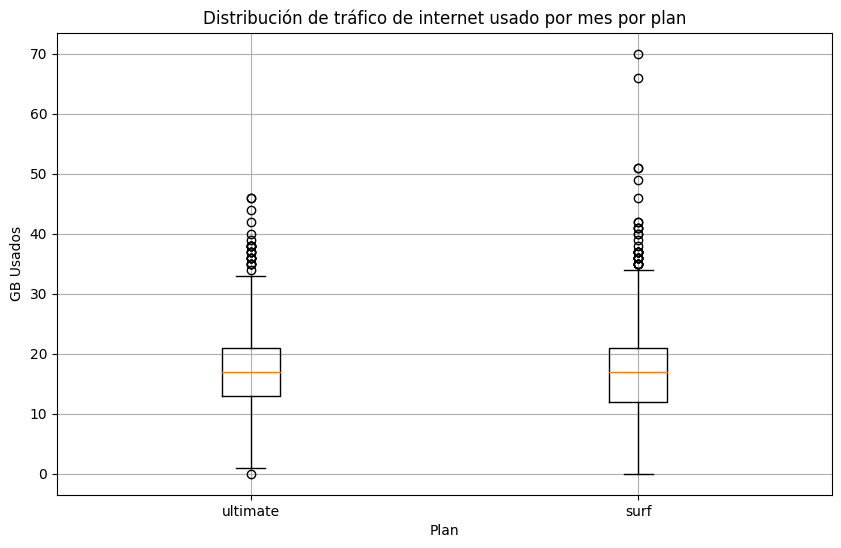

In [44]:
# Crear un diagrama de caja para la cantidad de tráfico de Internet por plan
plt.figure(figsize=(10, 6))
plans = final_data['plan'].unique()
data_to_plot = [final_data[final_data['plan'] == plan]['gb_used'] for plan in plans]

plt.boxplot(data_to_plot, labels=plans)
plt.title('Distribución de tráfico de internet usado por mes por plan')
plt.xlabel('Plan')
plt.ylabel('GB Usados')
plt.grid(True)
plt.show()

Conclusiones sobre el consumo de tráfico de internet

Con base en los nuevos resultados obtenidos, las conclusiones sobre el consumo de tráfico de internet son las siguientes:

Promedio de tráfico de internet utilizado: 

La media del tráfico de internet es bastante similar entre los planes surf y ultimate, con un uso promedio de 16.67 GB para surf y 17.31 GB para ultimate. Esto sugiere que, en general, los usuarios de ambos planes consumen cantidades similares de datos, independientemente del plan al que estén suscritos.

Varianza del uso de internet: 

La varianza del uso de internet es mayor para el plan surf (61.54) en comparación con ultimate (58.83). Esto indica una mayor dispersión en el uso de datos entre los usuarios del plan surf, lo que implica que hay una mayor diversidad en los patrones de consumo de datos dentro de este grupo.

Distribución del tráfico de internet (diagrama de caja): 

El diagrama de caja muestra que, aunque las medianas de uso de internet son bastante similares entre los dos planes, el plan surf tiene una mayor cantidad de usuarios que se encuentran en los extremos superiores de consumo, como lo indican los outliers. Esto sugiere que, aunque la mayoría de los usuarios de ambos planes utilizan cantidades moderadas de datos, algunos usuarios del plan surf tienden a utilizar significativamente más datos, lo que podría estar relacionado con comportamientos de consumo específicos o con características del plan que fomentan un uso intensivo.

En resumen, aunque los usuarios de ambos planes consumen cantidades similares de datos en promedio, los usuarios del plan surf muestran una mayor variabilidad en su uso de internet, con un grupo de usuarios que consume considerablemente más datos. Este comportamiento sugiere que el plan surf podría atraer a usuarios con necesidades más diversas o específicas en cuanto al consumo de datos.

## Ingreso

In [45]:
income_stats = final_data.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()

# Verificar los resultados
print(income_stats)

       plan       mean          var
0      surf  60.706408  3067.835152
1  ultimate  72.313889   129.848486


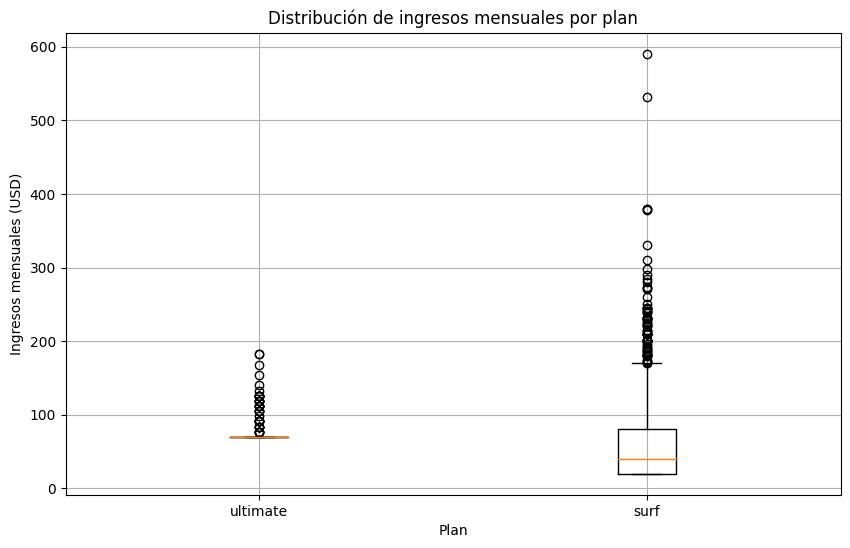

In [46]:
plt.figure(figsize=(10, 6))
plans = final_data['plan'].unique()
data_to_plot = [final_data[final_data['plan'] == plan]['monthly_revenue'] for plan in plans]

plt.boxplot(data_to_plot, labels=plans)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales (USD)')
plt.grid(True)
plt.show()

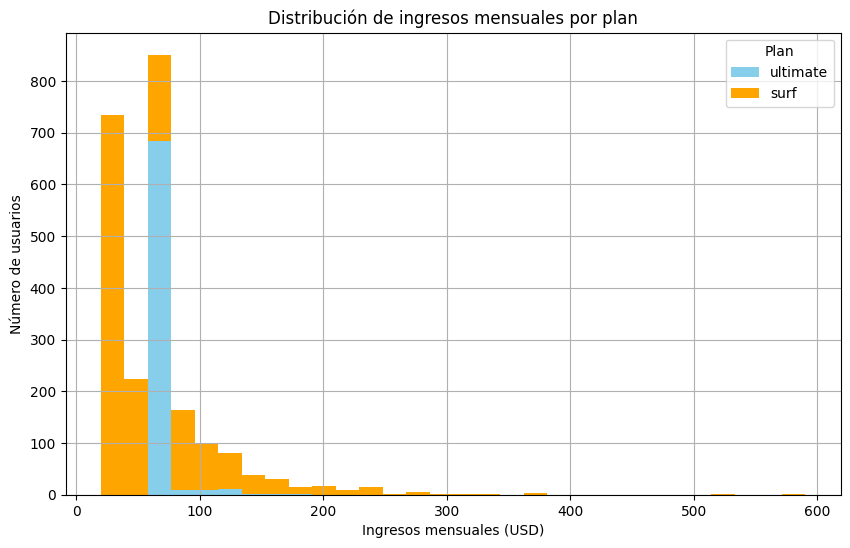

In [47]:
plt.figure(figsize=(10, 6))
plt.hist([final_data[final_data['plan'] == plan]['monthly_revenue'] for plan in plans], bins=30, stacked=True, label=plans, color=['skyblue', 'orange'])
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingresos mensuales (USD)')
plt.ylabel('Número de usuarios')
plt.legend(title='Plan')
plt.grid(True)
plt.show()


A partir de los gráficos y estadísticas obtenidas, se puede llegar a las siguientes conclusiones sobre los ingresos mensuales por plan:

Ingreso promedio:

El ingreso promedio es notablemente más alto para el plan Ultimate en comparación con el plan Surf. Esto se debe a la estructura de precios más elevada del plan Ultimate, que incluye un pago mensual base mayor.
Sin embargo, aunque el plan Surf tiene un ingreso promedio menor, la distribución de ingresos muestra que algunos usuarios pueden generar ingresos significativamente más altos debido a los cargos adicionales por exceder los límites del plan.

Varianza en los ingresos:

La varianza de los ingresos es mucho mayor para el plan Surf en comparación con el plan Ultimate. Esto indica que los ingresos derivados de los usuarios del plan Surf son mucho más variables y están influenciados en gran medida por el consumo adicional de servicios como minutos, mensajes y datos. En contraste, los ingresos del plan Ultimate son más consistentes, con una menor dispersión.

Distribución de ingresos:

La mayoría de los usuarios del plan Surf generan ingresos más bajos, pero con una amplia dispersión que incluye varios valores atípicos (outliers) que indican ingresos significativamente altos debido a cargos adicionales.
El plan Ultimate, por otro lado, muestra una distribución de ingresos más concentrada alrededor de su promedio, lo que sugiere que la mayoría de los usuarios generan ingresos similares y que estos no son tan impactados por el consumo adicional.

Conclusión:

Los ingresos del plan Ultimate son más estables y previsibles debido a su estructura de precios más elevada y menos dependiente de los cargos adicionales. En cambio, el plan Surf, aunque generalmente genera ingresos menores, tiene una mayor variabilidad que puede resultar en ingresos significativamente más altos en ciertos casos. Esta diferencia refleja las distintas estrategias de monetización entre los planes y cómo se comportan los usuarios dentro de cada uno.

## Prueba las hipótesis estadísticas

*Ahora, probaremos la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf:*

In [48]:
from scipy import stats as st

# Nivel de significancia
alpha = 0.05

# Filtrar los datos para obtener los ingresos de cada plan
ultimate_revenues = final_data[final_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenues = final_data[final_data['plan'] == 'surf']['monthly_revenue']

# Realizar la prueba t para muestras independientes
results = st.ttest_ind(ultimate_revenues, surf_revenues, equal_var=False)

# Mostrar el valor p
print('p-value:', results.pvalue)

# Comparar el valor p con el nivel de significancia
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


p-value: 3.1703905481135734e-15
Rechazamos la hipótesis nula


*Ahora, probaremos la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones:*

In [49]:
# Fusionar final_data con la tabla users para agregar la columna city
final_data = final_data.merge(users_df[['user_id', 'city']], on='user_id', how='left')

from scipy import stats as st

# Nivel de significancia
alpha = 0.05

# Filtrar los datos para obtener los ingresos de los usuarios del área NY-NJ y de otras regiones
ny_nj_revenues = final_data[final_data['city'].str.contains('NY-NJ')]['monthly_revenue']
other_revenues = final_data[~final_data['city'].str.contains('NY-NJ')]['monthly_revenue']

# Realizar la prueba t para muestras independientes
results = st.ttest_ind(ny_nj_revenues, other_revenues, equal_var=False)

# Mostrar el valor p
print('p-value:', results.pvalue)

# Comparar el valor p con el nivel de significancia
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

p-value: 0.03352561588530014
Rechazamos la hipótesis nula


## Conclusión general

## 2.16 conclusión general

A lo largo de este análisis, se han llevado a cabo diversas etapas de limpieza, procesamiento y análisis de datos para entender mejor el comportamiento de los usuarios en relación con las llamadas, los mensajes, el uso de internet y los ingresos generados por los planes de la empresa. A continuación, se resumen las conclusiones más importantes:

1. **Limpieza y procesamiento de datos**:
   - Se realizó un ajuste clave en el cálculo del uso de internet, redondeando los gigabytes usados mensualmente en lugar de redondear los valores de cada sesión individual, lo cual era incorrecto según la política de facturación de la empresa. Este ajuste permitió obtener un cálculo más preciso de los ingresos y el comportamiento de uso de los usuarios.
   - Los datos fueron agrupados por mes y usuario para facilitar el análisis mensual y por plan. Además, se completaron valores ausentes con ceros cuando correspondía, para asegurar que la ausencia de datos indicara falta de actividad del usuario en ese mes específico.

2. **Análisis del comportamiento de los usuarios**:
   - **Llamadas**: No se observaron diferencias significativas en la duración promedio de las llamadas entre los planes Surf y Ultimate. Aunque la duración promedio fue similar, se notó una mayor varianza en el plan Ultimate, sugiriendo un comportamiento más diverso en este grupo de usuarios.
   - **Mensajes**: La cantidad de mensajes enviados también mostró un comportamiento similar entre los planes, con ligeras diferencias en la media y la varianza. Los usuarios del plan Surf presentaron más variabilidad, reflejando una dispersión en el uso de mensajes.
   - **Internet**: El ajuste en el cálculo del uso de internet reveló que, en promedio, los usuarios de ambos planes consumen cantidades similares de datos. Sin embargo, el plan Surf presentó una mayor dispersión en el uso de internet, con algunos usuarios haciendo un uso intensivo de los datos.

3. **Análisis de ingresos**:
   - Los ingresos generados por los usuarios del plan Ultimate fueron, en promedio, mayores que los del plan Surf. Sin embargo, la varianza en los ingresos del plan Surf fue considerablemente mayor, indicando que algunos usuarios generan ingresos significativamente mayores que otros dentro del mismo plan.
   - Las pruebas de hipótesis confirmaron que las diferencias en los ingresos entre los planes y entre las regiones (NY-NJ y otras) son estadísticamente significativas. Esto sugiere que el plan y la ubicación geográfica son factores que influyen en los ingresos generados por los usuarios.

4. **Conclusión general**:
   - Las diferencias observadas en el comportamiento de los usuarios y los ingresos asociados a cada plan proporcionan información valiosa para la toma de decisiones estratégicas en la empresa. Aunque ambos planes satisfacen las necesidades de los usuarios en cuanto a llamadas, mensajes y datos, el plan Ultimate parece generar ingresos más consistentes, mientras que el plan Surf atiende a un grupo de usuarios con comportamientos más diversos.
   - Este análisis destaca la importancia de ajustar y procesar los datos correctamente, ya que pequeñas modificaciones en los cálculos pueden tener un impacto significativo en las conclusiones y decisiones finales.

Este proyecto ha demostrado que un análisis detallado y cuidadoso de los datos puede ofrecer insights clave sobre el comportamiento del usuario y la rentabilidad de diferentes planes, lo que es esencial para optimizar las estrategias de la empresa.
